# Final and Complete Comparison Clasif.

En este notebook se va a hacer la comparación para el paper de todo lo ejecutado (de clasificación).

Es decir se va a comparar: GLM nominal, GLM ordinal, y clasificación nominal (sklearn).

Este notebook es una ampliación del script *calculate_metrics_sort_compare*

**ATENCION: Para que este script funcione los ficheros de pred_probs tienen que estar en una carpeta diferente a los ficheros de pred**

## Código

Importar librerías

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import cohen_kappa_score, accuracy_score, \
							multilabel_confusion_matrix, precision_recall_fscore_support, \
							fbeta_score, recall_score#, top_k_accuracy_score

import os, sys
from fnmatch import fnmatch
import string
import itertools

# Añadir las librerías para hacer gráficas, etc
import seaborn as sns
import matplotlib.pyplot as plt

import os, sys, getpass, socket

user = getpass.getuser()
hostname = socket.gethostname()

if hostname == "carlos-DesktopPC":
    print(" Running on Linux Desktop, changing dir")
    os.chdir("/home/"+user+"/Documents/D/Niebla/")
    ROOT =   "/home/"+user+"/Documents/D/Niebla/"
else:
    print(" Running on OSX, changing dir")
    os.chdir("/Users/"+user+"/Documents/D/Niebla/")
    ROOT =   "/Users/"+user+"/Documents/D/Niebla/"

 Running on Linux Desktop, changing dir


Declaración de variables necesarias

In [2]:
mm_metrics=["precision", "recall","fbeta_score", "support"]

# Path operations
os.chdir(ROOT+"log_files/alg_comp/classification/nominal")

PREDS_PATH = ROOT+"log_files/predictions/classification/nominal/"
PROBS_PATH =  PREDS_PATH + "predicted_probabilities/"
DATA_PATH =  ROOT+"Data/Treated_Data/Classification/HoldOut/"
PREDS_PATH_ord = ROOT+"log_files/predictions/classification/ordinal/"
PLOTS_PATH = ROOT+"plots/metrics_comp/"

os.makedirs(PLOTS_PATH, exist_ok=True)

# Aux functions
get_dataset_nm = lambda x: x.split("-")[2]
get_lambda_val = lambda x: x.split("-")[3].split("=")[1]

# Aux variables
results_df = pd.DataFrame()

# Dictionary to create the pd.DF with
dict_df = {}
glm_dict_df = {}
glm_ord_dict_df = {}

# Short names for classifiers
shrt_nms = {"KNeighborsClassifier": "KNN", "GaussianNB": "GNB",
			"DecisionTreeClassifier": "DT","AdaBoostClassifier": "AB",
			"GradientBoostingClassifier": "GB", "BaggingClassifier": "Bagg",
			"RandomForestClassifier": "RF",}# "Persistence": "PSTC"}

Declaración de funciones auxiliares

In [3]:
# Definir función para obtener las métricas
def get_metrics(info, y_pred):
	info["acc"]  = accuracy_score(y_ts, y_pred)
	info["qwk"]  = cohen_kappa_score(y_ts, y_pred, weights="quadratic")
	#info["Rc_w"] = recall_score(y_ts, y_pred, average="weighted") # WARNING: Esto es exactamente lo mismo que ACC
    # En teoría es igual el micro_avg pero parece que weighted da igual resultado
	info["F1_w"] = fbeta_score(y_ts, y_pred, beta=1, average="weighted")
	#info["F2_w"] = fbeta_score(y_ts, y_pred, beta=2, average="weighted")

	mm = precision_recall_fscore_support(y_ts, y_pred, zero_division=0, beta=1)
	# TODO: se podría incluir aquí también las métricas medias de la función anterior
	for i in range(5):
		info[f"precision_{i}"] = mm[0][i]
		info[f"recall_{i}"] = mm[1][i]
		info[f"f1_score_{i}"] = mm[2][i]
        
def glm_match(f):
	return fnmatch(f, "GLM_elnet-*")#Nominal-*")

def nom_match(f):
	return fnmatch(f, "*pred_class.csv") and not fnmatch(f, "GLM*") and not fnmatch(f, "Persistence*")

Cargar datos de test

In [4]:
# Load data
test_data = pd.read_csv(DATA_PATH+"Test.csv")
y_ts = test_data["class"]

### Sacar las predicciones y las métricas

Primero cargar los ficheros **GLM_elnet** y sacar para cada fichero de train el mejor alpha.

In [5]:
# Aquí se saca un dict/pd.DF con todas las métricas para todas las combinaciones de GLM (alpha+dataset)
# TODO: ver qué interesa más sacar, si el mejor para cada dataset, o los _n_ mejores (se repetirían datasets)
#   => Creo que interesa más los _n_ mejores
for f in filter(glm_match, os.listdir(PREDS_PATH)):
	# Get info descripting the dataset to load
	if (nm := get_dataset_nm(f)[1:]) == "":
		nm = "OG"
	info = {"Model": "GLM", "Dataset":nm, "alpha":get_lambda_val(f)}

	print(info)

	# Load the dataset # Hay que añadir header=None porque en este caso el fichero no contiene nombre de columna
	y_pred = pd.read_csv(PREDS_PATH+f, squeeze=True, header=None)
	y_pred -= 1
	get_metrics(info, y_pred)

	# Store all information in the dict
	# #  Get all data from preds on a dict with the corresponding class
	# # to easily create the pd.DF
	glm_dict_df[f'{info["Dataset"]}-{info["alpha"]}'] = info

{'Model': 'GLM', 'Dataset': 'TL_SMT', 'alpha': '0.7'}
{'Model': 'GLM', 'Dataset': 'TL_SMT', 'alpha': '0'}
{'Model': 'GLM', 'Dataset': 'OG', 'alpha': '0.1'}
{'Model': 'GLM', 'Dataset': 'TL', 'alpha': '0.5'}
{'Model': 'GLM', 'Dataset': 'RUS', 'alpha': '0.3'}
{'Model': 'GLM', 'Dataset': 'CNN', 'alpha': '0.6'}
{'Model': 'GLM', 'Dataset': 'NCR', 'alpha': '0.3'}
{'Model': 'GLM', 'Dataset': 'SMT', 'alpha': '0.8'}
{'Model': 'GLM', 'Dataset': 'TL', 'alpha': '0.7'}
{'Model': 'GLM', 'Dataset': 'TL_SMT', 'alpha': '0.4'}
{'Model': 'GLM', 'Dataset': 'RUS_SMT', 'alpha': '0.7'}
{'Model': 'GLM', 'Dataset': 'NCR_SMT', 'alpha': '0.5'}
{'Model': 'GLM', 'Dataset': 'SMT', 'alpha': '0.4'}
{'Model': 'GLM', 'Dataset': 'RUS', 'alpha': '0.8'}
{'Model': 'GLM', 'Dataset': 'RUS_SMT', 'alpha': '0.8'}
{'Model': 'GLM', 'Dataset': 'TL_SMT', 'alpha': '0.8'}
{'Model': 'GLM', 'Dataset': 'RUS_SMT', 'alpha': '0'}
{'Model': 'GLM', 'Dataset': 'NCR', 'alpha': '0.4'}
{'Model': 'GLM', 'Dataset': 'TL_SMT', 'alpha': '0.2'}
{'Model

Crear un pd.DF para almacenar las métricas obtenidas y guardarlas en un csv

In [6]:
glm_res_df = pd.DataFrame(glm_dict_df).T
#glm_res_df.to_csv("GLM_nominal_complete_comparison.csv")

Cargar los ficheros **GLM_elnet Ordinal** y sacar para cada fichero de train el mejor alpha.

In [7]:
for f in filter(glm_match, os.listdir(PREDS_PATH_ord)):
	# Get info descripting the dataset to load
	if (nm := get_dataset_nm(f)[1:]) == "":
		nm = "OG"
	info = {"Model": "GLM", "Dataset":nm, "alpha":get_lambda_val(f)}

	print(info)

	# Load the dataset # Hay que añadir header=None porque en este caso el fichero no contiene nombre de columna
	y_pred = pd.read_csv(PREDS_PATH_ord+f, squeeze=True, header=0)
	y_pred -= 1
	get_metrics(info, y_pred)

	# Store all information in the dict
	# #  Get all data from preds on a dict with the corresponding class
	# # to easily create the pd.DF
	glm_ord_dict_df[f'{info["Dataset"]}-{info["alpha"]}'] = info

{'Model': 'GLM', 'Dataset': 'RUS', 'alpha': '1'}
{'Model': 'GLM', 'Dataset': 'TL_SMT', 'alpha': '0.3'}
{'Model': 'GLM', 'Dataset': 'OG', 'alpha': '0.7'}
{'Model': 'GLM', 'Dataset': 'NCR', 'alpha': '0.1'}
{'Model': 'GLM', 'Dataset': 'NCR', 'alpha': '0.8'}
{'Model': 'GLM', 'Dataset': 'CNN', 'alpha': '0.6'}
{'Model': 'GLM', 'Dataset': 'RUS_SMT', 'alpha': '0.8'}
{'Model': 'GLM', 'Dataset': 'OG', 'alpha': '0.1'}
{'Model': 'GLM', 'Dataset': 'OG', 'alpha': '0.3'}
{'Model': 'GLM', 'Dataset': 'RUS', 'alpha': '0.4'}
{'Model': 'GLM', 'Dataset': 'NCR_SMT', 'alpha': '1'}
{'Model': 'GLM', 'Dataset': 'NCR_SMT', 'alpha': '0.9'}
{'Model': 'GLM', 'Dataset': 'TL_SMT', 'alpha': '0.4'}
{'Model': 'GLM', 'Dataset': 'TL_SMT', 'alpha': '0.8'}
{'Model': 'GLM', 'Dataset': 'TL', 'alpha': '0.5'}
{'Model': 'GLM', 'Dataset': 'NCR_SMT', 'alpha': '0.4'}
{'Model': 'GLM', 'Dataset': 'SMT', 'alpha': '0.5'}
{'Model': 'GLM', 'Dataset': 'RUS', 'alpha': '0'}
{'Model': 'GLM', 'Dataset': 'RUS', 'alpha': '0.9'}
{'Model': 'GLM',

Crear un pd.DF para almacenar las métricas obtenidas y guardarlas en un csv

In [8]:
glm_ord_res_df = pd.DataFrame(glm_ord_dict_df).T
#glm_res_df.to_csv("GLM_nominal_complete_comparison.csv")

Cargar los ficheros de **clasif nominal (sklearn)** y sacar las métricas

In [9]:
for f in filter(nom_match, os.listdir(PREDS_PATH)):
	print(f" Loading file {f}")
	df = pd.read_csv(PREDS_PATH+f)

	mdl_nm = f.split("_")[0]
	mdl_nm_s = shrt_nms[mdl_nm]

	for (col, data) in df.iteritems():
		print(f"  Reading column {col}")
		info = {"Model": mdl_nm, "ShortName": mdl_nm_s, "Dataset": col}
		#TODO:; Continue
		get_metrics(info, data)

		dict_df[f"{mdl_nm_s}-{col}"] = info

 Loading file DecisionTreeClassifier_pred_class.csv
  Reading column OG
  Reading column RUS_SMT
  Reading column RUS
  Reading column NCR
  Reading column SMT
  Reading column CNN
  Reading column NCR_SMT
  Reading column TL
  Reading column TL_SMT
 Loading file RandomForestClassifier_pred_class.csv
  Reading column OG
  Reading column RUS_SMT
  Reading column RUS
  Reading column NCR
  Reading column SMT
  Reading column CNN
  Reading column NCR_SMT
  Reading column TL
  Reading column TL_SMT
 Loading file GaussianNB_pred_class.csv
  Reading column OG
  Reading column RUS_SMT
  Reading column RUS
  Reading column NCR
  Reading column SMT
  Reading column CNN
  Reading column NCR_SMT
  Reading column TL
  Reading column TL_SMT
 Loading file AdaBoostClassifier_pred_class.csv
  Reading column OG
  Reading column RUS_SMT
  Reading column RUS
  Reading column NCR
  Reading column SMT
  Reading column CNN
  Reading column NCR_SMT
  Reading column TL
  Reading column TL_SMT
 Loading file Ba

Cargar el fichero de **persistencia**

**Warning**: Quitada la persistencia de la comparación

In [10]:
#df = pd.read_csv(PREDS_PATH+"Persistence_pred_class.csv")

#info = {"Model": "Persistence", "ShortName": "PSTC", "Dataset": ""}
#get_metrics(info, df)

# Unir los clasificadores nominales de sklearn con la persistencia
# dict_df["PSTC"] = info

Obtener los nombres de los clasficadores utilizados

In [11]:
pd.DataFrame(dict_df).T["Model"].unique()

array(['DecisionTreeClassifier', 'RandomForestClassifier', 'GaussianNB',
       'AdaBoostClassifier', 'BaggingClassifier', 'KNeighborsClassifier',
       'GradientBoostingClassifier'], dtype=object)

Crear un pd.DF para almacenar las métricas obtenidas

In [12]:
nom_res_df = pd.DataFrame(dict_df).T

Ordenar los DF por valor de qwk para poder coger los n mejores si se quiere

In [13]:
# Cambiado para ordenar por F1_weighted

# Ordenar los valores por qwk de los clasificadores de sklearn
nom_res_df.sort_values(["F1_w"], ascending=False, inplace=True)
# Ordenar los valores por qwk de los clasificadores de glm
glm_res_df.sort_values(["F1_w"], ascending=False, inplace=True)
# Ordenar los valores por qwk de los clasificadores de glm ord
glm_ord_res_df.sort_values(["F1_w"], ascending=False, inplace=True)

#Añadir la columna ShortName para facilitar las cosas después
glm_res_df["ShortName"] = "GLM"
glm_ord_res_df["ShortName"] = "GLM_ord"

Guardar los ficheros en csv para poder hacer las gráficas (si se quiere) con ggplot

In [14]:
nom_res_df.to_csv(PLOTS_PATH+"nominal_metrics.csv")
glm_res_df.to_csv(PLOTS_PATH+"GLM_metrics.csv")
glm_ord_res_df.to_csv(PLOTS_PATH+"GLM_ord_metrics.csv")

In [15]:
nom_res_df.drop(["Model", "ShortName", "Dataset"],axis=1)

,acc,qwk,F1_w,precision_0,recall_0,f1_score_0,precision_1,recall_1,f1_score_1,precision_2,recall_2,f1_score_2,precision_3,recall_3,f1_score_3,precision_4,recall_4,f1_score_4
GB-NCR_SMT,0.825808,0.935976,0.828599,0.840607,0.877228,0.858527,0.832281,0.754085,0.791256,0.358234,0.476298,0.408915,0.333333,0.306288,0.319239,0.945698,0.942659,0.944176
GB-NCR,0.834004,0.934411,0.828405,0.879167,0.835644,0.856853,0.769963,0.85866,0.811896,0.403909,0.27991,0.330667,0.325,0.31643,0.320658,0.942388,0.950074,0.946215
GB-TL_SMT,0.825957,0.934815,0.828378,0.836466,0.881188,0.858245,0.833333,0.747549,0.788114,0.360544,0.478555,0.411251,0.336303,0.306288,0.320594,0.944609,0.944142,0.944376
GB-SMT,0.825808,0.933174,0.826898,0.842105,0.887129,0.864031,0.830462,0.748366,0.78728,0.34904,0.451467,0.393701,0.330233,0.288032,0.307692,0.941812,0.948097,0.944944
GB-RUS_SMT,0.82402,0.934649,0.826786,0.826816,0.879208,0.852207,0.826126,0.749183,0.785775,0.351536,0.465011,0.400389,0.336283,0.308316,0.321693,0.946597,0.941918,0.944252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GNB-NCR_SMT,0.580837,0.839499,0.609692,0.339249,0.984158,0.504569,0.482759,0.183007,0.265403,0.174622,0.3386,0.230415,0.142857,0.261663,0.184814,0.959603,0.716263,0.820266
GNB-TL_SMT,0.56236,0.832926,0.596278,0.339249,0.984158,0.504569,0.482759,0.183007,0.265403,0.174365,0.340858,0.23071,0.136711,0.290061,0.185835,0.961324,0.681908,0.79786
GNB-SMT,0.557294,0.831149,0.592266,0.339249,0.984158,0.504569,0.482759,0.183007,0.265403,0.174769,0.340858,0.231064,0.13321,0.292089,0.182973,0.960169,0.673258,0.791515
GNB-RUS_SMT,0.549098,0.822048,0.587607,0.346853,0.982178,0.512661,0.491632,0.191993,0.276146,0.162411,0.358916,0.223629,0.132463,0.288032,0.18147,0.964026,0.655709,0.780524


In [16]:
nom_res_df.drop(["Model", "ShortName", "Dataset"],axis=1)[["acc", "qwk", "F1_w"]]

,acc,qwk,F1_w
GB-NCR_SMT,0.825808,0.935976,0.828599
GB-NCR,0.834004,0.934411,0.828405
GB-TL_SMT,0.825957,0.934815,0.828378
GB-SMT,0.825808,0.933174,0.826898
GB-RUS_SMT,0.82402,0.934649,0.826786
...,...,...,...
GNB-NCR_SMT,0.580837,0.839499,0.609692
GNB-TL_SMT,0.56236,0.832926,0.596278
GNB-SMT,0.557294,0.831149,0.592266
GNB-RUS_SMT,0.549098,0.822048,0.587607


In [17]:
nom_res_df.drop(["Model", "ShortName", "Dataset"],axis=1)[["recall_0", "recall_1",
                                                           "recall_2", "recall_3", "recall_4"]]

,recall_0,recall_1,recall_2,recall_3,recall_4
GB-NCR_SMT,0.877228,0.754085,0.476298,0.306288,0.942659
GB-NCR,0.835644,0.85866,0.27991,0.31643,0.950074
GB-TL_SMT,0.881188,0.747549,0.478555,0.306288,0.944142
GB-SMT,0.887129,0.748366,0.451467,0.288032,0.948097
GB-RUS_SMT,0.879208,0.749183,0.465011,0.308316,0.941918
...,...,...,...,...,...
GNB-NCR_SMT,0.984158,0.183007,0.3386,0.261663,0.716263
GNB-TL_SMT,0.984158,0.183007,0.340858,0.290061,0.681908
GNB-SMT,0.984158,0.183007,0.340858,0.292089,0.673258
GNB-RUS_SMT,0.982178,0.191993,0.358916,0.288032,0.655709


**Ver qué relación hay entre las distintas métricas multiclase utilizadas**

<AxesSubplot:>

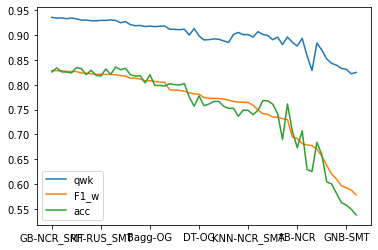

In [18]:
nom_res_df[["qwk", "F1_w","acc"]].plot()
#, "fbeta_score_0","fbeta_score_1","fbeta_score_2","fbeta_score_3","fbeta_score_4"]].plot()

Hay muchas que son prácticamente lo mismo, como se puede ver en la tabla de correlaciones. Ninguna baja de una correlación de 0.95.

En un principio se pensó en utilizar *recall* ([por las clases minoritarias interesa más como métrica](https://en.wikipedia.org/wiki/Precision_and_recall), ¿cuántos elementos de las clases minoritarias se están detectando?) con un weighted average (por soporte de la clase), resulta que da exactamente los mismos que *acc* ([aunque en teoría eso debería ser micro_avg](https://www.researchgate.net/post/Multiclass-classification-micro-weighted-recall-equals-accuracy)).

In [19]:
#nom_res_df[["F1_w","F2_w", "acc", "qwk"]].astype(np.float32).corr()

**TODO:** Se agrupan por metodología, se escoge el mejor de cada y se hace la comparación final con los mejores.

In [85]:
glm_res_df

,Model,Dataset,alpha,acc,qwk,F1_w,precision_0,recall_0,f1_score_0,precision_1,...,precision_2,recall_2,f1_score_2,precision_3,recall_3,f1_score_3,precision_4,recall_4,f1_score_4,ShortName
NCR_SMT-1,GLM,NCR_SMT,1,0.806437,0.931038,0.799861,0.654003,0.954455,0.776167,0.765101,...,0.356132,0.340858,0.348328,0.326371,0.25355,0.285388,0.935015,0.95304,0.943941,GLM
RUS_SMT-1,GLM,RUS_SMT,1,0.803606,0.929774,0.799563,0.662088,0.954455,0.781833,0.767705,...,0.355769,0.334086,0.344587,0.305936,0.271805,0.287863,0.937592,0.943154,0.940365,GLM
TL_SMT-1,GLM,TL_SMT,1,0.805692,0.929601,0.797074,0.653117,0.954455,0.775543,0.764649,...,0.355294,0.340858,0.347926,0.317919,0.223124,0.262217,0.929584,0.956006,0.94261,GLM
NCR-1,GLM,NCR,1,0.82253,0.920679,0.79589,0.801869,0.849505,0.825,0.693945,...,0.422414,0.110609,0.175313,0.300366,0.166329,0.214099,0.914332,0.968117,0.940456,GLM
TL-1,GLM,TL,1,0.826553,0.919321,0.794406,0.808194,0.859406,0.833013,0.696869,...,0.431034,0.112867,0.178891,0.320856,0.121704,0.176471,0.905492,0.978003,0.940352,GLM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RUS-0,GLM,RUS,0,0.778722,0.882411,0.709633,0.62585,0.182178,0.282209,0.569543,...,0.333333,0.00225734,0.0044843,0,0,0,0.873666,0.991349,0.928795,GLM
NCR-0,GLM,NCR,0,0.775741,0.880943,0.704138,0.589744,0.136634,0.221865,0.563627,...,0.333333,0.00225734,0.0044843,0,0,0,0.872905,0.991349,0.928365,GLM
TL-0,GLM,TL,0,0.775443,0.880301,0.703507,0.591304,0.134653,0.219355,0.565174,...,0.333333,0.00225734,0.0044843,0,0,0,0.871038,0.991597,0.927416,GLM
OG-0,GLM,OG,0,0.775145,0.879786,0.702552,0.585586,0.128713,0.211039,0.566448,...,0.5,0.00225734,0.00449438,0,0,0,0.869236,0.992338,0.926717,GLM


In [21]:
glm_ord_res_df

,Model,Dataset,alpha,acc,qwk,F1_w,precision_0,recall_0,f1_score_0,precision_1,...,precision_2,recall_2,f1_score_2,precision_3,recall_3,f1_score_3,precision_4,recall_4,f1_score_4,ShortName
NCR_SMT-1,GLM,NCR_SMT,1,0.777976,0.917744,0.768149,0.503153,0.790099,0.614792,0.704478,...,0.334135,0.31377,0.323632,0.293919,0.176471,0.220532,0.925494,0.960949,0.942888,GLM_ord
TL_SMT-1,GLM,TL_SMT,1,0.777827,0.917204,0.76686,0.500629,0.788119,0.612308,0.704,...,0.335714,0.318284,0.326767,0.294545,0.1643,0.210938,0.923004,0.962926,0.942543,GLM_ord
SMT-1,GLM,SMT,1,0.776784,0.915816,0.764276,0.49875,0.790099,0.611494,0.70202,...,0.334129,0.316027,0.324826,0.290196,0.150101,0.197861,0.919473,0.965151,0.941758,GLM_ord
CNN-1,GLM,CNN,1,0.770675,0.908672,0.763414,0.714706,0.481188,0.575148,0.621176,...,0.331579,0.142212,0.199052,0.237589,0.271805,0.253548,0.938473,0.908552,0.92327,GLM_ord
CNN-0.9,GLM,CNN,0.9,0.76993,0.907863,0.762648,0.707831,0.465347,0.561529,0.619578,...,0.336842,0.14447,0.202212,0.239437,0.275862,0.256362,0.938697,0.908304,0.923251,GLM_ord
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCR_SMT-0,GLM,NCR_SMT,0,0.602891,0,0.453527,0,0,0,0,...,0,0,0,0,0,0,0.602891,1,0.752254,GLM_ord
NCR-0.1,GLM,NCR,0.1,0.602891,0,0.453527,0,0,0,0,...,0,0,0,0,0,0,0.602891,1,0.752254,GLM_ord
TL-0,GLM,TL,0,0.602891,0,0.453527,0,0,0,0,...,0,0,0,0,0,0,0.602891,1,0.752254,GLM_ord
TL-0.1,GLM,TL,0.1,0.602891,0,0.453527,0,0,0,0,...,0,0,0,0,0,0,0.602891,1,0.752254,GLM_ord


## TODO: (Antiguo)

Esta es la parte a continuar dependiendo del criteria que se vaya a coger para la comparación

**Para hacer las gráficas y las tablas del paper hacer esto:**

Hacer tres categorías: 
* clasificación nominal
    * Árboles y otros
* GLM nominal
* GLM ordinal

Hacer en cada apartado una comparación con gráficas y tablas. Sacar de cada una las 2/3 mejores para la comparación final y poner las escogidas en tablas/gráficas.


**Baseline**


En el notebook _Early & Simple Classification Baseline_ está hecha la persistencia (modelo baseline con "conocimiento experto (_Modelo trivial con "conocimiento experto"_) que es predecir la clase a parte del valor de visibilidad) y da mejor resultado que el resto de cosas.

**TODO**: Habría que meter la persistencia en la comparación final para dar un baseline.

#### Seleccionar los mejores para cada modelo de clasificación nominal

La manera de seleccionar los mejores para cada modelo es esta en un pd.DF

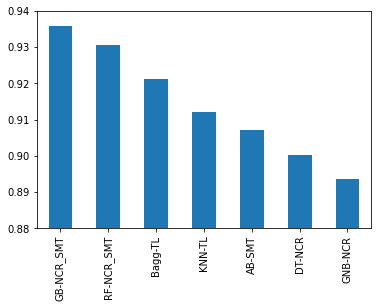

In [22]:
best_nom = []

for i in shrt_nms.keys():
    best_nom.append(nom_res_df.index[nom_res_df.Model == i][0])

nom_res_df.loc[best_nom]["qwk"].sort_values(ascending=False).plot(kind="bar", ylim=(.88,.94));

#### Seleccionar los mejores de clasificación nominal de GLM

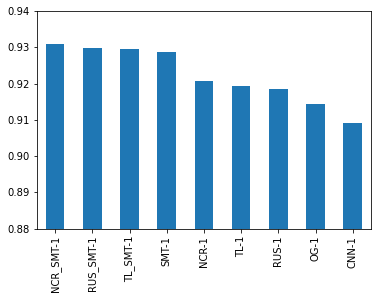

In [23]:
Datasets_nm = glm_res_df["Dataset"].unique()

best_GLM = []

for i in Datasets_nm:
    best_GLM.append(glm_res_df.index[glm_res_df["Dataset"] == i][0])

glm_res_df.loc[best_GLM]["qwk"].sort_values(ascending=False).plot(kind="bar", ylim=(.88,.94));

La mediana por valor de alpha en GLM

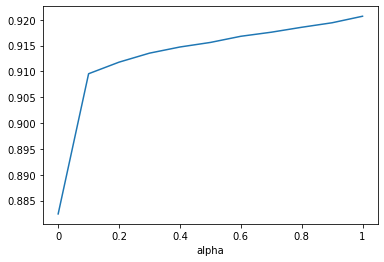

In [24]:
glm_res_df["qwk"] = glm_res_df["qwk"].astype(np.float)
glm_res_df.groupby("alpha")["qwk"].median().plot();

#### Seleccionar los mejores de clasificación ordinal de GLM

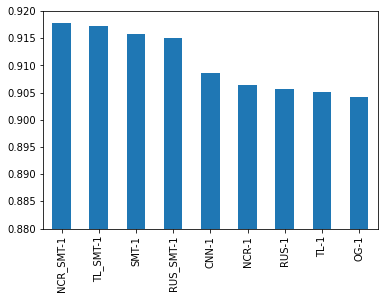

In [25]:
# TODO

best_GLM_ord = []

for i in Datasets_nm:
    best_GLM_ord.append(glm_ord_res_df.index[glm_ord_res_df["Dataset"] == i][0])

glm_ord_res_df.loc[best_GLM_ord]["qwk"].sort_values(ascending=False).plot(kind="bar", ylim=(.88,.92));

In [88]:
a = glm_ord_res_df.loc[best_GLM_ord]
b = glm_res_df.loc[best_GLM]

a["Method"] = "Ordinal"
b["Method"] = "Nominal"

cols = list(itertools.chain(list(a.columns[0:1]),
                            list(a.columns[-1:]),
                            list(a.columns[1:2]),
                            list(a.columns[2:-2])))

Este código comentado es para sacar las tablas de latex

In [ ]:
#pd.concat([a,b])[cols].sort_values("F1_w", ascending=False)[["Method","acc", "qwk", "F1_w"]]
#pd.concat([a,b])[cols].sort_values("F1_w", ascending=False)[["Method","recall_0", "recall_1",
#                                                             "recall_2", "recall_3", "recall_4"]]
#
#pd.concat([a,b])[cols].sort_values("F1_w", ascending=False)[["Method","acc", "qwk", "F1_w",
#                                                             "recall_0", "recall_1","recall_2",
#                                                             "recall_3", "recall_4"]]

#print(pd.concat([a,b])[cols].to_latex())

**Guardar en una tabla los mejores de nominal** (el mejor de cada modelo) y los mejores de GLM (1 nom y 1 ord)

In [26]:
best_overall_df = nom_res_df.loc[best_nom]
best_overall_df.loc["GLM-NCR_SMT-1"]     = glm_res_df.drop("alpha",axis=1).iloc[0]
best_overall_df.loc["GLM_ord-NCR_SMT-1"] = glm_ord_res_df.drop("alpha",axis=1).iloc[0]

In [27]:
best_overall_df.sort_values("F1_w", ascending=False, inplace=True)

In [28]:
best_overall_df.to_csv(PLOTS_PATH+"best_overall_classif.csv")

Este código comentado es para sacar las tablas de latex

In [97]:
#print(best_overall_df[["acc", "qwk", "F1_w"]].to_latex())

#print(best_overall_df[["recall_0", "recall_1",
#                 "recall_2", "recall_3", "recall_4"]].to_latex())

#print(best_overall_df[["acc", "qwk", "F1_w",
#                 "recall_0", "recall_1",
#                 "recall_2", "recall_3", "recall_4"]].to_latex())

### Comparación general

Comparación del mejor modelo de cada uno de los dataset obtenidos con las métricas:

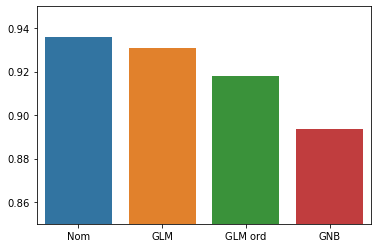

In [29]:
data = pd.DataFrame(index=["Nom","GLM","GLM ord", "GNB"],
                    data=[nom_res_df["qwk"][0],
                          glm_res_df["qwk"][0],
                          glm_ord_res_df["qwk"][0],
                          nom_res_df[nom_res_df.ShortName == "GNB"].iloc[0]["qwk"]])

p = sns.barplot(data=data.T);
p.set(ylim=(0.85,.95));

In [30]:
data

,0
Nom,0.935976
GLM,0.931038
GLM ord,0.917744
GNB,0.893728


#### Comparación de todas las métricas para el mejor de cada

El que tiene mejor media de métricas es el primero, que aparte de tener las de la clase 4 muy altas, también tiene las de las clases 0 y 1 bastante altas (más que las otras dos) aunque baje mucho en las clases 2 y 3.

*Nominal prediction*

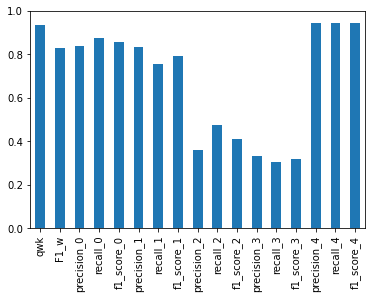

In [31]:
nom_res_df.iloc[0,4:].plot(kind="bar", ylim=(0,1));

*GLM*

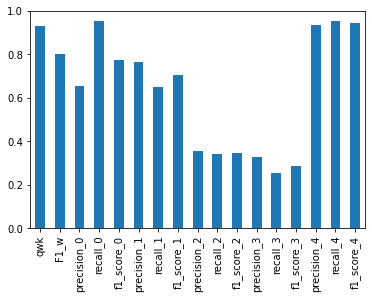

In [32]:
glm_res_df.iloc[0,4:-1].plot(kind="bar", ylim=(0,1));

*GLM Ordinal*

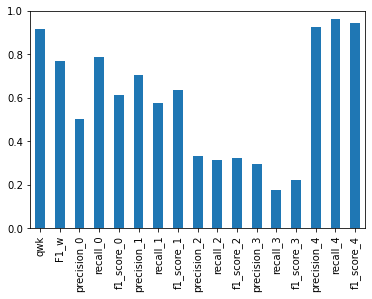

In [33]:
glm_ord_res_df.iloc[0,4:-1].plot(kind="bar", ylim=(0,1));

# DONE

**Para las gráficas**

1. Hacer las gráficas (separadas) con F1-score de R (colorines) **con todos los modelos** para los csv de:
    1. sklearn nominal
    2. GLM
    3. GLM ordinal
    
2. Sacar los mejores de GLM nom y ord, y meter en la misma gráfica que los **mejores por modelo** de nominal (como la gráfica *nom_res_df*), es decir, añadiendo las dos barras de GLM. Sacar esto para las métricas:
    1. Accuracy
    2. QWK
    3. F1-score
    4. Y la suma del recall por clase (la gráfica stack plot de R) (sacando los mejores de cada clasificador) (con 10 barras que serían los 10 clasificadores) (podrían ser 9 si se quita la persistencia)
    5. Poner la misma anterior como F1-score
    
    
**Para las tablas**

1. Añadir la misma tabla que representa los datos puestos en gráfica. Serían las tablas de los In[17], y In[18], pero sólo con los mejores modelos (9 o 10).

2. Tablas tochas:
    1. La primera la de sklearn nominal con TODO
    2. Las otra, de GLM, seleccionando el mejor alpha (9 valores, uno por cada dataset) y que contenga los valores del GLM nominal y ordinal (18 elementos que corresponden a: {Nominal/Ordinal}-{Dataset}-alpha
    
**Importante**: *guardar las gráficas en eps*

### Quedamos en hacer lo de regresión otro día